In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from datetime import datetime
import os
import psycopg2
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [32]:
postgres_pwd=os.environ['LHL_DATABASE']

In [33]:
con = psycopg2.connect(database='mid_term_project', 
                       user='lhl_student',
                       password = postgres_pwd,
                       host='mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com',
                       port='5432')

query = con.cursor()

In [ ]:
query.close()

In [34]:
query.execute("""
select *
from flights
where fl_date LIKE '2019%'
limit 500000 """)

response = query.fetchall()
cols1 = [column[0] for column in query.description]

In [36]:
# flights_500 = pd.DataFrame(response,columns= cols1)
flights_500.to_csv('flights_500_19.csv',index = False)

In [77]:
with open('flights_500_19.csv')as g:
    flights_19 = pd.read_csv(g)

In [81]:
headers = flights_19.columns.to_list()
headers

['fl_date',
 'mkt_unique_carrier',
 'branded_code_share',
 'mkt_carrier',
 'mkt_carrier_fl_num',
 'op_unique_carrier',
 'tail_num',
 'op_carrier_fl_num',
 'origin_airport_id',
 'origin',
 'origin_city_name',
 'dest_airport_id',
 'dest',
 'dest_city_name',
 'crs_dep_time',
 'dep_time',
 'dep_delay',
 'taxi_out',
 'wheels_off',
 'wheels_on',
 'taxi_in',
 'crs_arr_time',
 'arr_time',
 'arr_delay',
 'cancelled',
 'cancellation_code',
 'diverted',
 'dup',
 'crs_elapsed_time',
 'actual_elapsed_time',
 'air_time',
 'flights',
 'distance',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay',
 'first_dep_time',
 'total_add_gtime',
 'longest_add_gtime',
 'no_name']

In [82]:
with open('sample.csv')as f:
    flights = pd.read_csv(f,names=headers,header= None)

In [85]:
print(flights.shape)
flights.head()

(1000000, 42)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-09-03,DL,DL,DL,2391,DL,N350NA,2391,10721,BOS,...,1124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-06-04,UA,UA_CODESHARE,UA,4039,EV,N11539,4039,14633,RST,...,268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-11,WN,WN,WN,6354,WN,N723SW,6354,12889,LAS,...,628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-04-12,WN,WN,WN,1082,WN,N7709A,1082,14107,PHX,...,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-11-05,G4,G4,G4,1692,G4,247NV,1692,14082,PGD,...,890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
columns_test = ['fl_date','mkt_carrier','mkt_carrier_fl_num','tail_num','origin_airport_id',
                'origin_city_name','dest_airport_id','dest_city_name','crs_dep_time','crs_arr_time'
                ,'crs_elapsed_time','distance','dep_delay']

In [86]:
test = flights[columns_test]
test.head()

,fl_date,mkt_carrier,mkt_carrier_fl_num,tail_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,dep_delay
0,2018-09-03,DL,2391,N350NA,10721,"Boston, MA",13487,"Minneapolis, MN",1626,1839,193.0,1124,-6.0
1,2019-06-04,UA,4039,N11539,14633,"Rochester, MN",13930,"Chicago, IL",530,659,89.0,268,-6.0
2,2018-09-11,WN,6354,N723SW,12889,"Las Vegas, NV",11292,"Denver, CO",1955,2240,105.0,628,-6.0
3,2018-04-12,WN,1082,N7709A,14107,"Phoenix, AZ",12191,"Houston, TX",530,955,145.0,1020,-2.0
4,2018-11-05,G4,1692,247NV,14082,"Punta Gorda, FL",12917,"Columbus, OH",1228,1449,141.0,890,-2.0


In [91]:
test=test.dropna().reset_index(drop = True)

In [93]:
test.head()

,fl_date,mkt_carrier,mkt_carrier_fl_num,tail_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,dep_delay
0,2018-09-03,DL,2391,N350NA,10721,"Boston, MA",13487,"Minneapolis, MN",1626,1839,193.0,1124,-6.0
1,2019-06-04,UA,4039,N11539,14633,"Rochester, MN",13930,"Chicago, IL",530,659,89.0,268,-6.0
2,2018-09-11,WN,6354,N723SW,12889,"Las Vegas, NV",11292,"Denver, CO",1955,2240,105.0,628,-6.0
3,2018-04-12,WN,1082,N7709A,14107,"Phoenix, AZ",12191,"Houston, TX",530,955,145.0,1020,-2.0
4,2018-11-05,G4,1692,247NV,14082,"Punta Gorda, FL",12917,"Columbus, OH",1228,1449,141.0,890,-2.0


In [173]:
test.origin_city_name.value_counts()

Chicago, IL              58595
Atlanta, GA              48977
New York, NY             36467
Dallas/Fort Worth, TX    35991
Denver, CO               33891
                         ...  
Gustavus, AK                 9
Hyannis, MA                  9
Rota, TT                     8
Owensboro, KY                8
Bullhead City, AZ            2
Name: origin_city_name, Length: 367, dtype: int64

In [94]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [44]:
labelenmkt = LabelEncoder()
labelentail = LabelEncoder()

In [95]:
test['mkt_carrier_Cat'] = labelenmkt.fit_transform(test['mkt_carrier'])
test['tail_num_Cat'] = labelentail.fit_transform(test['tail_num'])

In [96]:
print(labelenmkt.classes_)
print(len(labelentail.classes_))

['AA' 'AS' 'B6' 'DL' 'F9' 'G4' 'HA' 'NK' 'UA' 'VX' 'WN']
6443


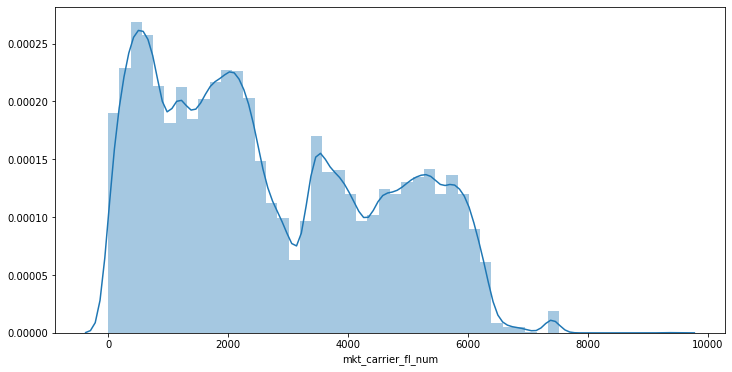

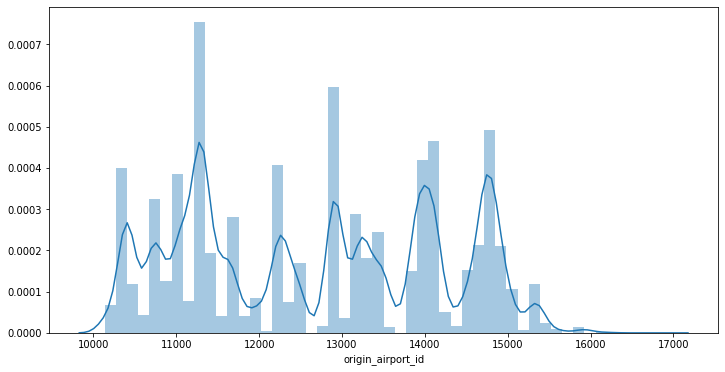

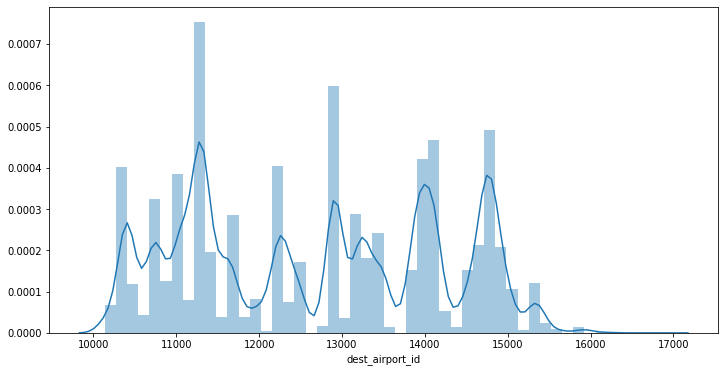

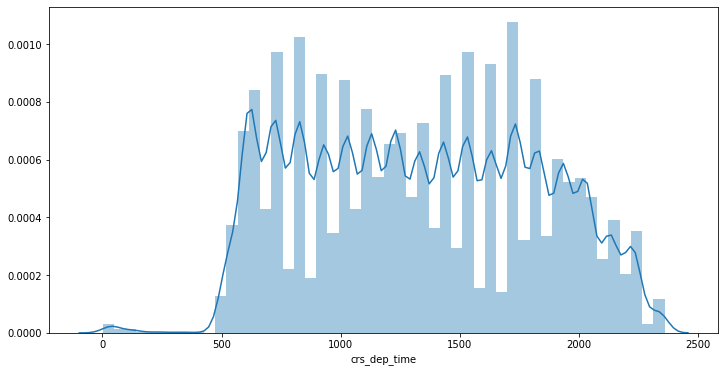

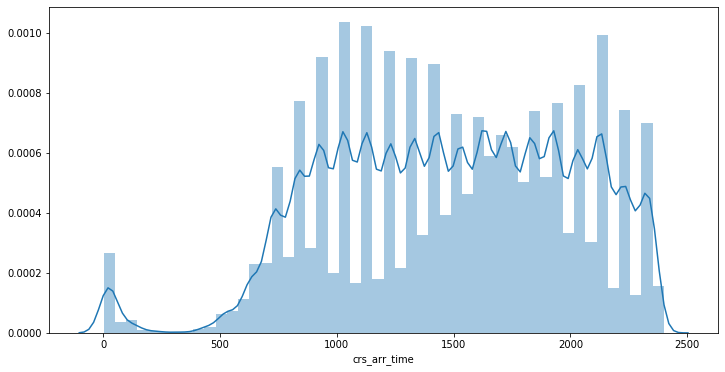

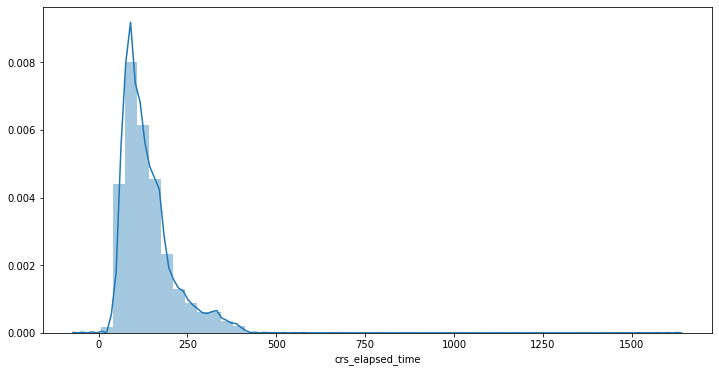

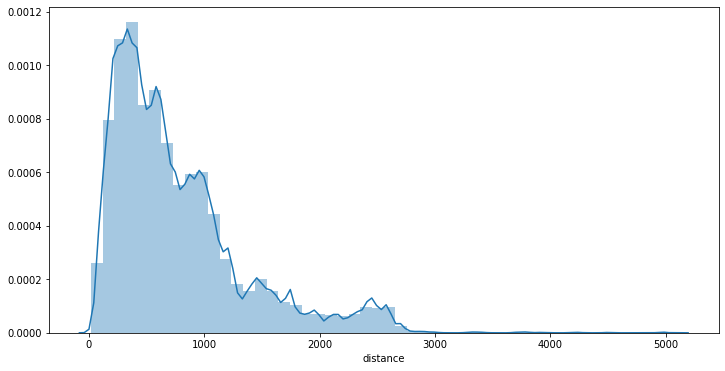

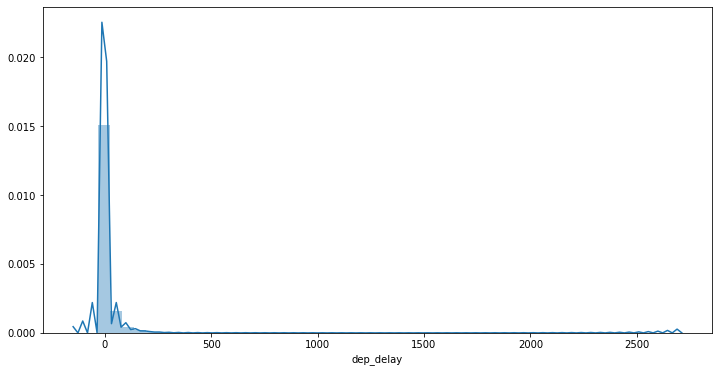

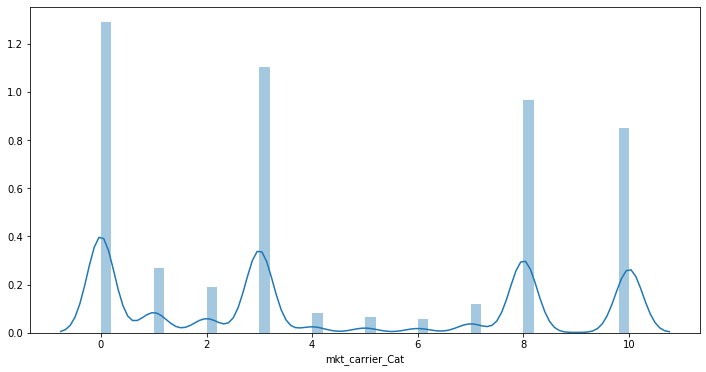

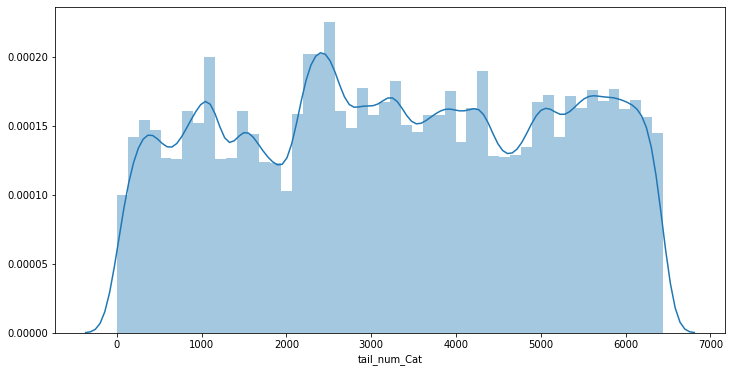

In [97]:
for cl in test._get_numeric_data().columns:
    # histogram (withou extreme values)
    plt.figure(figsize=(12, 6))
    sns.distplot(test[cl])
    plt.show()

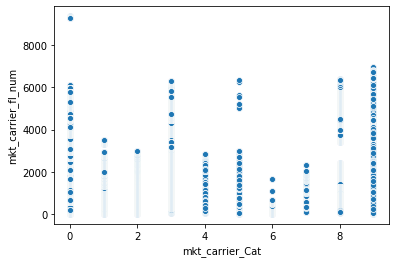

In [14]:
sns.scatterplot(y='mkt_carrier_fl_num',x='mkt_carrier_Cat',data=test)

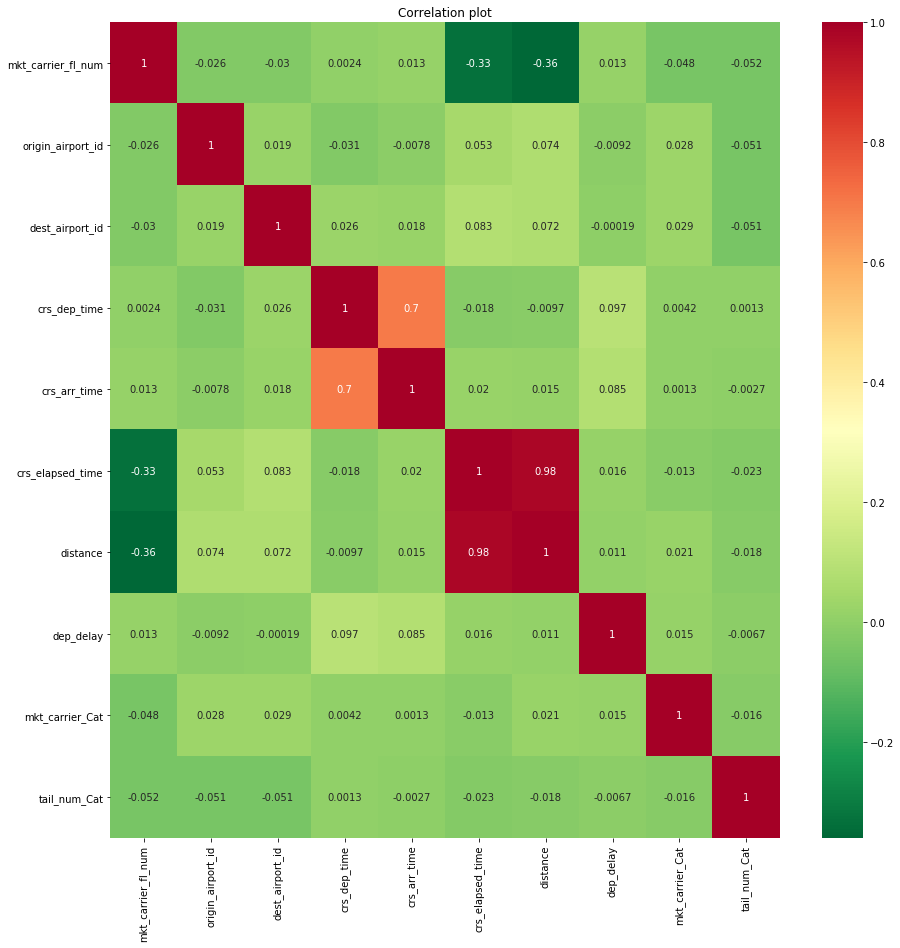

In [98]:
plt.figure(figsize=(15,15))
df_corr = test._get_numeric_data().corr()
# plot the correlations
sns.heatmap(df_corr,annot=True,cmap="RdYlGn_r")
plt.title('Correlation plot')
plt.show;

In [99]:
a = test._get_numeric_data().columns.to_list()
a.append('fl_date')

In [100]:
df = test[a]
df.head()

,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,dep_delay,mkt_carrier_Cat,tail_num_Cat,fl_date
0,2391,10721,13487,1626,1839,193.0,1124,-6.0,3,1730,2018-09-03
1,4039,14633,13930,530,659,89.0,268,-6.0,8,220,2019-06-04
2,6354,12889,11292,1955,2240,105.0,628,-6.0,10,3860,2018-09-11
3,1082,14107,12191,530,955,145.0,1020,-2.0,10,4131,2018-04-12
4,1692,14082,12917,1228,1449,141.0,890,-2.0,5,28,2018-11-05


In [102]:
# df.fl_date = pd.to_datetime(df.fl_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983308 entries, 0 to 983307
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   mkt_carrier_fl_num  983308 non-null  int64         
 1   origin_airport_id   983308 non-null  int64         
 2   dest_airport_id     983308 non-null  int64         
 3   crs_dep_time        983308 non-null  int64         
 4   crs_arr_time        983308 non-null  int64         
 5   crs_elapsed_time    983308 non-null  float64       
 6   distance            983308 non-null  int64         
 7   dep_delay           983308 non-null  float64       
 8   mkt_carrier_Cat     983308 non-null  int32         
 9   tail_num_Cat        983308 non-null  int32         
 10  fl_date             983308 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(2), int64(6)
memory usage: 75.0 MB


In [171]:
# 0 is for monday and 6 is sunday
df['month'] = df.fl_date.dt.month
df['dayof_theweek'] = df.fl_date.dt.dayofweek
df['year'] = df.fl_date.dt.year
df["WEEKEND"] = ((df.fl_date.dt.dayofweek) // 5 == 1).astype(float)

In [172]:
df.head()

,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,dep_delay,mkt_carrier_Cat,tail_num_Cat,fl_date,month,dayof_theweek,WEEKEND,year
0,2391,10721,13487,1626,1839,193.0,1124,-6.0,3,1730,2018-09-03,9,0,0.0,2018
1,4039,14633,13930,530,659,89.0,268,-6.0,8,220,2019-06-04,6,1,0.0,2019
2,6354,12889,11292,1955,2240,105.0,628,-6.0,10,3860,2018-09-11,9,1,0.0,2018
3,1082,14107,12191,530,955,145.0,1020,-2.0,10,4131,2018-04-12,4,3,0.0,2018
4,1692,14082,12917,1228,1449,141.0,890,-2.0,5,28,2018-11-05,11,0,0.0,2018


In [140]:
df.origin_airport_id.value_counts()

10397    48977
13930    48074
11298    35991
11292    33891
12892    30887
         ...  
11997        9
13983        8
14582        8
10562        3
10590        2
Name: origin_airport_id, Length: 375, dtype: int64

In [174]:
#select airport and there max traffic line
# step1 = df.groupby(by=['origin_airport_id','mkt_carrier_Cat'],as_index= False)\
#                                 .agg({'dest_airport_id':'count'})\
#                                 .rename(columns={'dest_airport_id':'count'})\
#                                 .sort_values('count', ascending=False)\
#                                 .drop_duplicates(['origin_airport_id'])
step1 = df.groupby(by=['origin_airport_id','mkt_carrier_Cat'],as_index= False)\
                                .agg({'dest_airport_id':'count'})\
                                .rename(columns={'dest_airport_id':'count'})\

step1.head()

,origin_airport_id,mkt_carrier_Cat,count
0,10135,0,269
1,10135,3,213
2,10135,5,115
3,10135,8,81
4,10136,0,271


In [175]:
new_df = pd.merge(df,step1,  how='inner', left_on=['origin_airport_id','mkt_carrier_Cat'],
                  right_on = ['origin_airport_id','mkt_carrier_Cat'])
print(new_df.shape)
print(df.shape)

(983308, 16)
(983308, 15)


In [152]:
def periodof_day(x):
    if  x >= 500 and x < 1200:
        return 1
    elif x >= 1200 and x < 1700:
        return 2
    elif x >= 1700 and x < 2100: 
        return 3
    return 4

In [176]:
# new_df = new_df.rename(columns={'count':'Nos_flight_carr/airport'})
new_df['periodof_day ']= new_df.crs_dep_time.apply(lambda x:periodof_day(x))
new_df.head()

,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,dep_delay,mkt_carrier_Cat,tail_num_Cat,fl_date,month,dayof_theweek,WEEKEND,year,count,periodof_day
0,2391,10721,13487,1626,1839,193.0,1124,-6.0,3,1730,2018-09-03,9,0,0.0,2018,4421,2
1,2213,10721,10397,1600,1900,180.0,946,-3.0,3,1822,2019-12-14,12,5,1.0,2019,4421,2
2,5269,10721,14122,635,833,118.0,496,-17.0,3,380,2019-04-09,4,1,0.0,2019,4421,1
3,2488,10721,14771,735,1118,403.0,2704,-4.0,3,3610,2019-06-26,6,2,0.0,2019,4421,1
4,2651,10721,14747,710,1041,391.0,2496,20.0,3,1961,2018-01-06,1,5,1.0,2018,4421,1


In [179]:
new_df._get_numeric_data().shape

(983308, 16)

In [180]:
sc= preprocessing.Normalizer()
new_sam = sc.fit_transform(new_df._get_numeric_data())
df_sca=pd.DataFrame(new_sam, columns = new_df._get_numeric_data().columns)
df_sca.head()

,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,dep_delay,mkt_carrier_Cat,tail_num_Cat,month,dayof_theweek,WEEKEND,year,count,periodof_day
0,0.130344,0.584450,0.735237,0.088641,0.100252,0.010521,0.061274,-0.000327,0.000164,0.094310,0.000491,0.000000,0.000000,0.110010,0.241009,0.000109
1,0.136726,0.662379,0.642361,0.098853,0.117388,0.011121,0.058447,-0.000185,0.000185,0.112569,0.000741,0.000309,0.000062,0.124741,0.273144,0.000124
2,0.274944,0.559436,0.736905,0.033135,0.043467,0.006157,0.025882,-0.000887,0.000157,0.019829,0.000209,0.000052,0.000000,0.105354,0.230694,0.000052
3,0.126762,0.546229,0.752575,0.037448,0.056962,0.020533,0.137767,-0.000204,0.000153,0.183928,0.000306,0.000102,0.000000,0.102867,0.225248,0.000051
4,0.136920,0.553722,0.761658,0.036670,0.053766,0.020194,0.128914,0.001033,0.000155,0.101282,0.000052,0.000258,0.000052,0.104226,0.228337,0.000052


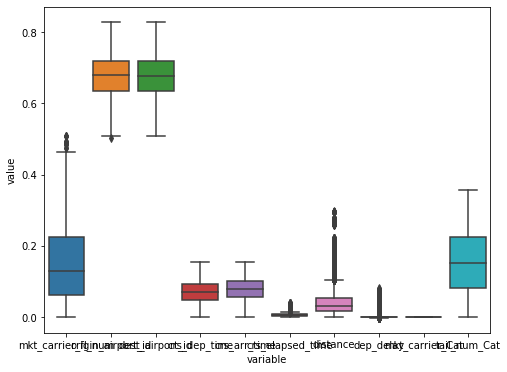

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x="variable", y="value", data=pd.melt(df_sca))
plt.show()

In [20]:
test1 = test[test.dep_delay < 200]

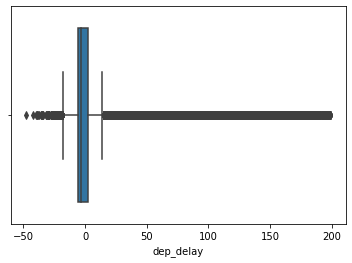

In [150]:
sns.boxplot(test1.dep_delay)
plt.show()

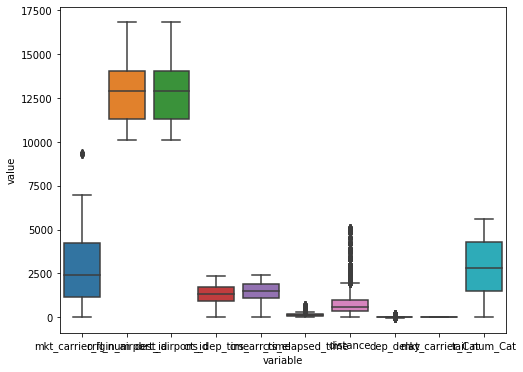

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x="variable", y="value", data=pd.melt(test1._get_numeric_data()))
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

In [171]:
model = sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              dep_delay   R-squared (uncentered):                   0.028
Model:                            OLS   Adj. R-squared (uncentered):              0.028
Method:                 Least Squares   F-statistic:                              593.9
Date:                Tue, 25 Aug 2020   Prob (F-statistic):                        0.00
Time:                        17:51:34   Log-Likelihood:                      8.5801e+05
No. Observations:              185520   AIC:                                 -1.716e+06
Df Residuals:                  185511   BIC:                                 -1.716e+06
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
mkt_carrier_fl_num     0.0004   6.12e-05      7.173      0.000       0.000       0.001
origin_airport_id     -0.0002   5.16e-05     -4.157      0.000      -0.000      -0.000
dest_airport_id    -6.172e-05   5.53e-05     -1.116      0.265      -0.000    4.67e-05
crs_dep_time           0.0025      0.000      8.518      0.000       0.002       0.003
crs_arr_time           0.0015      0.000      5.462      0.000       0.001       0.002
crs_elapsed_time       0.0488      0.007      6.796      0.000       0.035       0.063
distance              -0.0051      0.001     -5.724      0.000      -0.007      -0.003
mkt_carrier_Cat        0.3430      0.029     11.828      0.000       0.286       0.400
tail_num_Cat          -0.0001   6.26e-05     -2.266      0.023      -0.000   -1.91e-05
==============================================================================
Omnibus:                   311838.850   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        364889638.398
Skew:                          11.445   Prob(JB):                         0.00
Kurtosis:                     219.057   Cond. No.                     5.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [182]:
df_sca.head()

,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,dep_delay,mkt_carrier_Cat,tail_num_Cat,month,dayof_theweek,WEEKEND,year,count,periodof_day
0,0.130344,0.584450,0.735237,0.088641,0.100252,0.010521,0.061274,-0.000327,0.000164,0.094310,0.000491,0.000000,0.000000,0.110010,0.241009,0.000109
1,0.136726,0.662379,0.642361,0.098853,0.117388,0.011121,0.058447,-0.000185,0.000185,0.112569,0.000741,0.000309,0.000062,0.124741,0.273144,0.000124
2,0.274944,0.559436,0.736905,0.033135,0.043467,0.006157,0.025882,-0.000887,0.000157,0.019829,0.000209,0.000052,0.000000,0.105354,0.230694,0.000052
3,0.126762,0.546229,0.752575,0.037448,0.056962,0.020533,0.137767,-0.000204,0.000153,0.183928,0.000306,0.000102,0.000000,0.102867,0.225248,0.000051
4,0.136920,0.553722,0.761658,0.036670,0.053766,0.020194,0.128914,0.001033,0.000155,0.101282,0.000052,0.000258,0.000052,0.104226,0.228337,0.000052


In [181]:
new_df._get_numeric_data().head()

,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,dep_delay,mkt_carrier_Cat,tail_num_Cat,month,dayof_theweek,WEEKEND,year,count,periodof_day
0,2391,10721,13487,1626,1839,193.0,1124,-6.0,3,1730,9,0,0.0,2018,4421,2
1,2213,10721,10397,1600,1900,180.0,946,-3.0,3,1822,12,5,1.0,2019,4421,2
2,5269,10721,14122,635,833,118.0,496,-17.0,3,380,4,1,0.0,2019,4421,1
3,2488,10721,14771,735,1118,403.0,2704,-4.0,3,3610,6,2,0.0,2019,4421,1
4,2651,10721,14747,710,1041,391.0,2496,20.0,3,1961,1,5,1.0,2018,4421,1


In [183]:
X=new_df._get_numeric_data().drop(columns='dep_delay')
y=new_df._get_numeric_data().dep_delay

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state=101)

In [185]:
lin = LinearRegression()
lin = lin.fit(X_train,y_train)
y_pred = lin.predict(X_test)

In [186]:
metrics.mean_squared_error(y_test,y_pred)

2268.2593742119516

In [187]:
metrics.r2_score(y_test,y_pred)

0.012090048631168027

In [188]:
rand = RandomForestRegressor(max_depth= 10, random_state= 15)
rand = rand.fit(X_train,y_train)
y_predr = rand.predict(X_test)

In [189]:
print(metrics.r2_score(y_test,y_predr))
print(metrics.mean_squared_error(y_test,y_predr))

0.016371530059840156
2258.4290142964105


In [83]:
def eliminateCorrFeatures(coef_, df):
    """
    coef_ should be between 0 and 1
    """
    df_corr = df.corr().abs()
    indices = np.where(df_corr > coef_) 
    indices = [(df_corr.index[x], df_corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
    for idx in indices: #each pair
        try:
            df.drop(idx[1], axis = 1, inplace=True)
        except KeyError:
            pass
    return df

In [85]:
df = eliminateCorrFeatures(0.8, flights_19a)

In [87]:
df

,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_delay,taxi_out,wheels_on,taxi_in,crs_elapsed_time
0,2429,11618,11292,1700,51.0,19.0,1958.0,6.0,266.0
1,2429,12889,11618,730,-2.0,23.0,1500.0,6.0,284.0
2,2427,13495,12266,520,-3.0,12.0,623.0,7.0,80.0
3,2426,12266,10721,955,-5.0,27.0,1416.0,4.0,211.0
4,2425,13204,12266,1549,-3.0,10.0,1659.0,8.0,156.0
...,...,...,...,...,...,...,...,...,...
246830,3063,14107,14689,1537,89.0,26.0,1744.0,4.0,94.0
246831,3063,14689,14107,1641,88.0,16.0,2029.0,5.0,93.0
246832,3064,15412,13930,2028,17.0,20.0,2127.0,21.0,114.0
246833,3065,11603,14107,1203,-3.0,24.0,1522.0,5.0,144.0
